## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset

metadata_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
metadata_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.

mouse_count = metadata_results["Mouse ID"].value_counts()
mouse_count

g989    13
t718    10
m650    10
j984    10
f345    10
        ..
o848     1
d133     1
v199     1
n482     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 

#code help of slackoverflow

duplicate = metadata_results[metadata_results[['Mouse ID', 'Timepoint']].duplicated () == True]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Display all the data for the duplicate mouse ID. 

#code help of slackoverflow

dup_count = metadata_results[metadata_results.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup_count


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.

clean_data =  metadata_results.loc[metadata_results["Mouse ID"] != 'g989']
clean_data





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_count_updated = clean_data["Mouse ID"].value_counts()
mouse_count_updated

t718    10
m650    10
j984    10
f345    10
c402    10
        ..
l872     1
x336     1
h428     1
o848     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [11]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_drugs = metadata_results.groupby(["Drug Regimen"])

tumor_mean = group_drugs["Tumor Volume (mm3)"].mean()
tumor_median = group_drugs["Tumor Volume (mm3)"].median()
tumor_var = group_drugs["Tumor Volume (mm3)"].var()
tumor_std = group_drugs["Tumor Volume (mm3)"].std()
tumor_sem = group_drugs["Tumor Volume (mm3)"].sem()

tumor_table = pd.DataFrame ({"Mean": tumor_mean, "Median":tumor_median, "Varience":tumor_var, "Standard Deviation": tumor_std,
                            "SEM":tumor_sem})

tumor_table



,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_table = group_drugs.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
agg_tumor_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

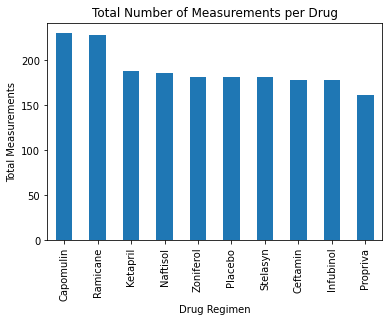

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measure = metadata_results["Drug Regimen"].value_counts()
total_measure.plot(kind = "bar", title="Total Number of Measurements per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")


plt.show()


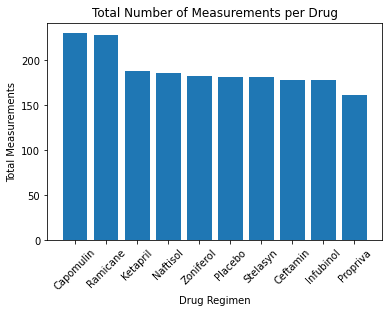

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(total_measure.index.values, total_measure.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.title("Total Number of Measurements per Drug")
plt.xticks(rotation=45)

plt.show()

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


mouse_per_gender = metadata_results["Sex"].value_counts()

metadata_results.plot(kind='pie', y=[mouse_per_gender])



KeyError: "None of [Index([(958, 935)], dtype='object')] are in the [columns]"

([<matplotlib.patches.Wedge at 0x1e7c27b71f0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'male'),
  Text(0.020992503472585782, -1.0997996703027118, 'female')])

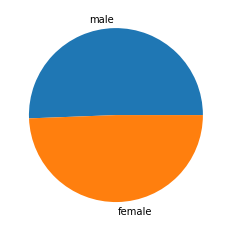

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["male", "female"]
plt.pie(mouse_per_gender, labels=labels)



## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#tumor_volume = metadata_results.loc("Capomulin", "Ramica")

# Start by getting the last (greatest) timepoint for each mouse

last_time = metadata_results.groupby("Mouse ID")["Timepoint"].max()


last_time = last_time.reset_index()

last_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_time_df = pd.merge(last_time, metadata_results, on=["Mouse ID", "Timepoint"], how="left")
last_time_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [33]:
# Put treatments into a list for a for loop (and later for plot labels)

treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatments in treatments_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_vol = last_time_df.loc[last_time_df["Drug Regimen"] == treatments, "Tumor Volume (mm3)"]
    
    
    # add subset 
    
    tumor_vol_data.append(tumor_vol)
    
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    
    print(f"For Drug {treatments}, the lower quartile is {lowerq}")
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    

For Drug Capomulin, the lower quartile is 32.37735684
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
For Drug Ramicane, the lower quartile is 31.56046955
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
For Drug Infubinol, the lower quartile is 54.04860769
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
For Drug Ceftamin, the lower quartile is 48.72207785
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


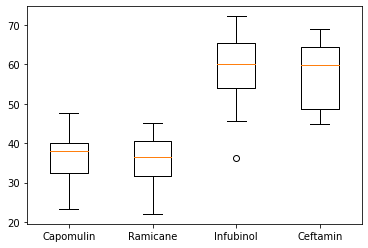

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data, labels=treatments_list)
plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#locate the drug reg using .loc where it equals capo
#only need to use just one mouse 
#create the above two series and then create the plot



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#same as above using .loc 


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen